In [1]:
#Please execute this cell
import jupman;

# Exam -  Wed 08, Jun 2022

**Scientific Programming - Data Science Master @ University of Trento**

## [Download exercises and solutions](../../../_static/generated/sciprog-ds-2022-06-08-exam.zip) 


# A. Trans-Atlantic Slave Trade

Open Jupyter and start editing this notebook `exam-2022-06-08.ipynb`. You will analyze voyages of slaves from Africa to the America of two centuries ago.

<div class="alert alert-warning">
    
**NOTICE: this part of the exam was** [ported to softpython](https://en.softpython.org/projects/slave-trade/slave-trade-sol.html) **website**
    
There you can find a more curated version (notice it may be longer than here)
</div>    


**Data provider**: The Trans-Atlantic Slave Trade Database. 2020. SlaveVoyages. [https://www.slavevoyages.org](https://www.slavevoyages.org). You are enouraged to explore the dataset with the [very interesting online tool](https://www.slavevoyages.org/voyage/database) they built, in particular check out the [Maps](https://www.slavevoyages.org/voyage/database#maps) and [Timelapse](https://www.slavevoyages.org/voyage/database#timelapse) tabs.

**Data license**:

- Historical data: The Trans-Atlantic Slave Trade Database. 2020. SlaveVoyages. [https://www.slavevoyages.org](https://www.slavevoyages.org) (accessed June 9, 2020). License: Public domain (use restrictions do not apply).
- Imputed data: Estimates. 2020. SlaveVoyages. [https://slavevoyages.org/assessment/estimates](https://slavevoyages.org/assessment/estimates) (accessed June 9, 2020). License: Creative Commons Attribution-Noncommercial 3.0 United States License.

## A1 read_trade

Each line in [slave-trade.csv](slave-trade.csv) represents a ship voyage from a purchase place to a landing place. Parse it with a csv reader and output a list of dictionaries, one per voyage according to the output excerpt.

- Each ship has a nation flag `NATINIMP`
- Each voyage has purchase place code `MJBYPTIMP` and a landing place code `MJSLPTIMP` with five digits format `xyzvt` that indicate a specific town: you **MUST** save more generic codes of the form `xyz00` which indicate broader regions.


* **WARNING 1**: convert to int **only** `VOYAGEID` and `YEARAM`, leave `MJBYPTIMP` and `MJSLPTIMP` as strings
- **WARNING 2:** some codes in `slave-trade.csv` have a space instead of a number, in those cases save code `00000`

In [2]:
import pandas as pd   
import numpy as np    
df = pd.read_csv('slave-trade.csv', encoding='UTF-8')
df[df.VOYAGEID.isin([1, 2024, 2393, 4190])]


,VOYAGEID,YEARAM,NATINIMP,MJBYPTIMP,MJSLPTIMP
0,1,1817,Portugal/Brazil,60820,50299
2000,2024,1840,U.S.A.,60615,31399
2361,2393,1829,Spain/Uruguay,60212,
4000,4190,1854,U.S.A.,60515,31301


**Region labels**: For each location you need to also save its label, which you can find in separate file [region-codes.csv](region-codes.csv) (load the file with a csv reader)

- **WARNING 1:** in `region-codes.csv` there are **only** codes in format `xyz00`
- **WARNING 2:** some region codes are missing, in those cases place label `'unknown'`

In [3]:
import pandas as pd   
dfr = pd.read_csv('region-codes.csv', encoding='UTF-8', dtype=str)
dfr[dfr.Value.isin(['60800','60600','31300','50200','60500'])]


,Value,Region
47,31300,Cuba
84,50200,Bahia
92,60500,Bight of Benin
93,60600,Bight of Biafra and Gulf of Guinea islands
95,60800,Southeast Africa and Indian Ocean islands


###### **Output excerpt:** (for full output see [expected_db.py](expected_db.py))

```python
>>> read_voyages('slave-trade.csv', 'region-codes.csv')
[
{'flag': 'Portugal/Brazil',
 'id': 1,
 'landing_id': '50200',
 'landing_label': 'Bahia',
 'purchase_id': '60800',
 'purchase_label': 'Southeast Africa and Indian Ocean islands',
 'year': 1817},
{'flag': 'U.S.A.',
 'id': 2024,
 'landing_id': '31300',
 'landing_label': 'Cuba',
 'purchase_id': '60600',
 'purchase_label': 'Bight of Biafra and Gulf of Guinea islands',
 'year': 1840},
{'flag': 'Spain/Uruguay',
 'id': 2393,
 'landing_id': '00000',
 'landing_label': 'unknown',
 'purchase_id': '60200',
 'purchase_label': 'Sierra Leone',
 'year': 1829},
{'flag': 'U.S.A.',
 'id': 4190,
 'landing_id': '31300',
 'landing_label': 'Cuba',
 'purchase_id': '60500',
 'purchase_label': 'Bight of Benin',
 'year': 1854},
  .
  .
]
```

In [4]:

import csv

def read_voyages(slave_trade_csv, region_codes_csv):
    
        
    with open(region_codes_csv, encoding='utf-8', newline='') as fregions:
        my_reader = csv.DictReader(fregions, delimiter=',')       

        regions_db = {}
        for d in my_reader:                    
            regions_db[d['Value']] = d['Region']        
                        
    with open(slave_trade_csv, encoding='utf-8', newline='') as f:
        my_reader = csv.DictReader(f, delimiter=',')       

        ret = []
        
        for d in my_reader:  

            voyage = {}
            voyage['id'] = int(d['VOYAGEID'])            
            voyage['year'] = int(d['YEARAM'])            
            voyage['flag'] = d['NATINIMP']            

            if  d['MJBYPTIMP'].strip():
                pur_reg = d['MJBYPTIMP'][:3] + '00'
                voyage['purchase_id'] = pur_reg
                if pur_reg in regions_db:
                    voyage['purchase_label'] = regions_db[pur_reg]
                else:
                    voyage['purchase_label'] = 'unknown'
            else:
                voyage['purchase_id'] = '00000'
                voyage['purchase_label'] = 'unknown'

            if d['MJSLPTIMP'].strip():
                lan_reg = d['MJSLPTIMP'][:3] + '00'            
                voyage['landing_id'] = lan_reg
                if lan_reg in regions_db:
                    voyage['landing_label'] = regions_db[lan_reg]
                else:
                    voyage['landing_label'] = 'unknown'
            else:
                voyage['landing_id'] = '00000'
                voyage['landing_label'] = 'unknown'
            
            ret.append(voyage)                        
            
        return ret
    
    
voyages_db = read_voyages('slave-trade.csv', 'region-codes.csv')

print('OUTPUT EXCERPT:')
from pprint import pformat
print('[\n' +',\n'.join([pformat(voyages_db[vid]) for vid in [0,2000,2361, 4000]]) + ',\n  .\n  .\n]')

OUTPUT EXCERPT:
[
{'flag': 'Portugal/Brazil',
 'id': 1,
 'landing_id': '50200',
 'landing_label': 'Bahia',
 'purchase_id': '60800',
 'purchase_label': 'Southeast Africa and Indian Ocean islands',
 'year': 1817},
{'flag': 'U.S.A.',
 'id': 2024,
 'landing_id': '31300',
 'landing_label': 'Cuba',
 'purchase_id': '60600',
 'purchase_label': 'Bight of Biafra and Gulf of Guinea islands',
 'year': 1840},
{'flag': 'Spain/Uruguay',
 'id': 2393,
 'landing_id': '00000',
 'landing_label': 'unknown',
 'purchase_id': '60200',
 'purchase_label': 'Sierra Leone',
 'year': 1829},
{'flag': 'U.S.A.',
 'id': 4190,
 'landing_id': '31300',
 'landing_label': 'Cuba',
 'purchase_id': '60500',
 'purchase_label': 'Bight of Benin',
 'year': 1854},
  .
  .
]


In [4]:

import csv

def read_voyages(slave_trade_csv, region_codes_csv):
    raise Exception('TODO IMPLEMENT ME !')
    
voyages_db = read_voyages('slave-trade.csv', 'region-codes.csv')

print('OUTPUT EXCERPT:')
from pprint import pformat
print('[\n' +',\n'.join([pformat(voyages_db[vid]) for vid in [0,2000,2361, 4000]]) + ',\n  .\n  .\n]')

In [5]:
# TESTING
from pprint import pformat; from expected_db import expected_db
for i in range(0, len(expected_db)):
    if expected_db[i] != voyages_db[i]:
        print('\nERROR at index', i, ':')
        print('  ACTUAL:\n', pformat(voyages_db[i]))
        print('  EXPECTED:\n', pformat(expected_db[i]))
        break
if len(voyages_db) != len(expected_db):
    print("ERROR: Different lengths!  voyages_db:", len(voyages_db), "   expected_db:", len(expected_db))

## A2 Deportation

For each link purchase -> landing place,  count in how many voyages it was present, then draw result in networkx. 

- as edge `weight` use a normalized value from 0.0 to 1.0 (maximal count found in the graph)
- show only edges with weight greater or equal to `min_weight` 
- to display the graph from right to left, set `G.graph['graph']= {'rankdir':'RL'}`
- for networkx attributes [see this example](https://en.softpythonorg/relational/relational1-intro-sol.html#Fancy-networkx-graphs), **make sure to display edges proportionally to the weight**

```python
>>> show_deportation(voyages_db, 0.09)  
COUNTS EXCERPT SOLUTION:
{
  ('60800', '50200') : 48,
  ('60700', '50200') : 1301,
  ('60700', '50400') : 2770,
  ('60800', '50400') : 443,
  ('60900', '50400') : 196,
    .
}
```

![expected-deportation-plot.png](resized_expected-deportation-plot.png)

COUNTS EXCERPT SOLUTION:
{
  ('60800', '50200') : 48,
  ('60700', '50200') : 1301,
  ('60700', '50400') : 2770,
  ('60800', '50400') : 443,
  ('60900', '50400') : 196,
    .
    .
}
Image saved to file:  expected-deportation-plot.png


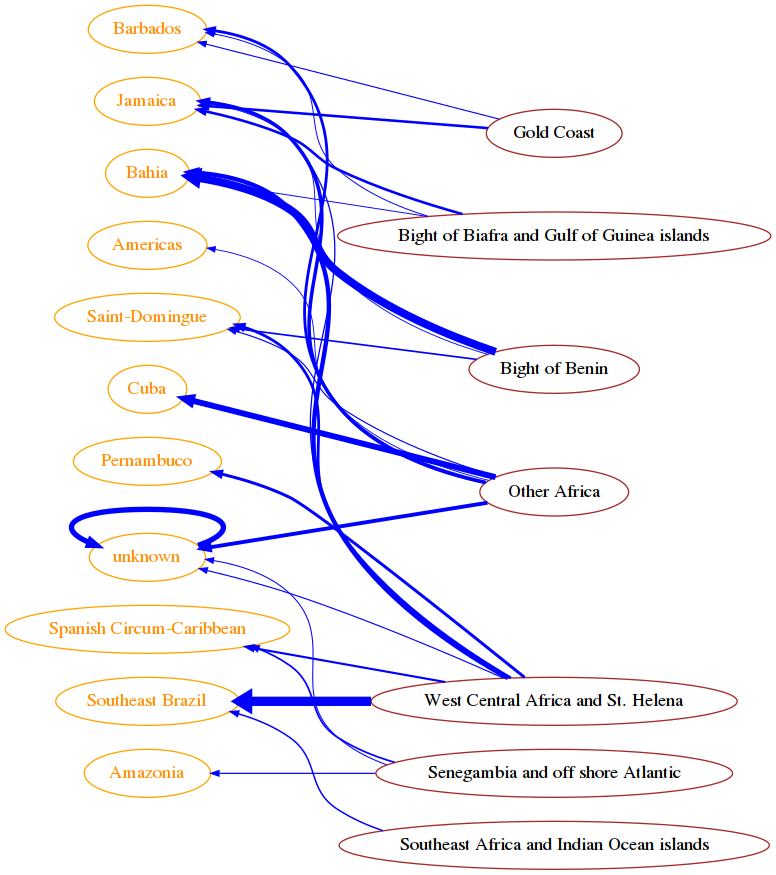

In [6]:

import networkx as nx
import sys
sys.path.append('../../')
from sciprog import draw_nx

def show_deportation(voyages, min_weight):
    
                            
    edges = {}    
    
    for v in voyages_db:
        t = (v['purchase_id'], v['landing_id'])        
        if t in edges:
            edges[t] += 1
        else:
            edges[t] = 1        
            
                
        
    G = nx.DiGraph()
    G.graph['graph']= {'rankdir':'RL'}    # force horiz right to left layout

    mx = max(edges.values())
    for v in voyages_db:        
        s = edges[(v['purchase_id'], v['landing_id'])]
        r = s / mx
        if r >= min_weight:
            G.add_node(v['purchase_id'], fontcolor='black', color='brown', label=v['purchase_label'])
            G.add_node(v['landing_id'], fontcolor='darkorange', color='orange', label=v['landing_label'])
            G.add_edge(v['purchase_id'],v['landing_id'], 
                       color="blue",
                       penwidth= 7 * r, 
                       weight=r)

    draw_nx(G, 
                    
           )
    
show_deportation(voyages_db, 0.09)    
#show_deportation(voyages_db, 0.06)

In [6]:

import networkx as nx
import sys
sys.path.append('../../')
from sciprog import draw_nx

def show_deportation(voyages, min_weight):
    raise Exception('TODO IMPLEMENT ME !')
show_deportation(voyages_db, 0.09)    
#show_deportation(voyages_db, 0.06)

## A3 The time to stop

Given a nation flag, plot inside `draw_time` the number of voyages per year done by ships belonging to that flag. **DO NOT** call `plt.show` nor `plt.figure`. We show some counts example but to calculate the data feel free to use any method you want. **To associate a plot to a label, use i.e.** `plt.plot(xs, ys, label='France')`

```python
>>> fig = plt.figure(figsize=(15,6)) 
>>> draw_time(voyages_db, 'France')
>>> draw_time(voyages_db, 'U.S.A.')
>>> draw_time(voyages_db, 'Great Britain')
>>> plt.legend()    
>>> plt.show()
France COUNTS EXCERPT SOLUTION:
{
        1816:7,
       1819:30,
       1821:59,
       .
}
U.S.A. COUNTS EXCERPT SOLUTION:
{
        1821:1,
        1827:1,
        1837:2,
       .
}
Great Britain COUNTS EXCERPT SOLUTION:
{       1810:1,
        1809:1,
        1811:1,
       .
}
```

![expected-time-to-stop.png](expected-time-to-stop.png)

France COUNTS EXCERPT SOLUTION:
{
        1816:7,
       1819:30,
       1821:59,
       .
       .
              }
U.S.A. COUNTS EXCERPT SOLUTION:
{
        1821:1,
        1827:1,
        1837:2,
       .
       .
              }
Great Britain COUNTS EXCERPT SOLUTION:
{
        1810:1,
        1809:1,
        1811:1,
       .
       .
              }


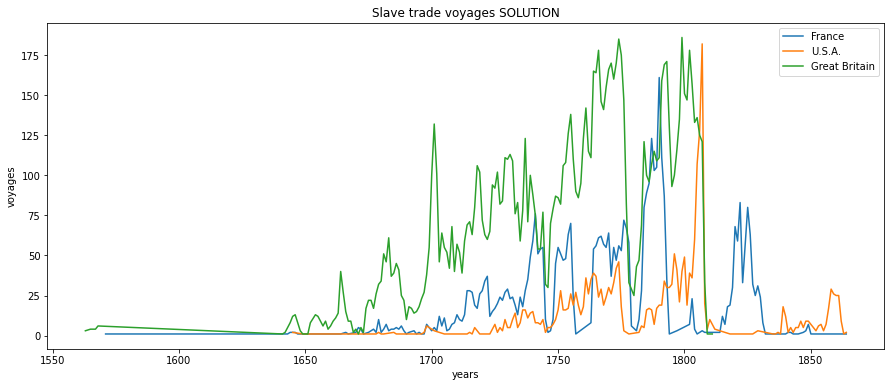

In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
            
def draw_time(voyages, flag):
    
        
    plt.title("Slave trade voyages SOLUTION")    
    plt.xlabel('years')
    plt.ylabel('voyages')            
        
    counts = {}    
    for v in voyages:    
        if v['flag'] == flag:                    
            y = v['year']
            if y in counts:
                counts[y] += 1
            else:
                counts[y] = 1
    
                
            
    xs = sorted(counts.keys())
    ys = [counts[x] for x in xs]    
    plt.plot(xs, ys, label=flag)        
    

fig = plt.figure(figsize=(15,6)) 
draw_time(voyages_db, 'France')
draw_time(voyages_db, 'U.S.A.')
draw_time(voyages_db, 'Great Britain')
plt.legend()    

plt.show()

In [7]:

%matplotlib inline
import matplotlib.pyplot as plt
            
def draw_time(voyages, flag):
    raise Exception('TODO IMPLEMENT ME !')

fig = plt.figure(figsize=(15,6)) 
draw_time(voyages_db, 'France')
draw_time(voyages_db, 'U.S.A.')
draw_time(voyages_db, 'Great Britain')
plt.legend()    

plt.show()

## B1.1 Theory

**Write the solution in separate `theory.txt` file**. Given a list $L$ of $n$ elements, please compute the asymptotic computational complexity of the $myFun$ function, explaining your reasoning. 

In [8]:
def myFun(L):
    T = []
    N = len(L)
    for i in range(N//4):
        k = 0
        tmp = 0
        while k < 4:
            tmp += L[i]*k
            k = k + 1
        T.insert(0,tmp)

    return(T)  

## B1.2 BFS

Describe what a BFS visit of a graph is. Please provide the order of visited nodes of a possible BFS visit on the following graph (starting from node 'a'):

![img/bfs.png](img/resized_bfs.png)

## B2 BinaryTree is_heap_stack

* Open Visual Studio Code and start editing the folder on your desktop. Implement this:

def is_heap_stack(self):
    """ A tree is a min heap if each node data is less or equal than its children data.
        RETURN True if the tree is a min heap, False otherwise
        
        - DO *NOT* use recursion
        - implement it with a while and a stack (as a python list)            
        - MUST run in O(n), where n is the tree size
    """


**Testing**: `python3 -m unittest bin_tree_test`

In [10]:
from bin_tree_test import bt
from bin_tree_sol import *
t = bt(7,
        bt(9, 
                bt(10,
                        bt(40)),
                bt(14)),
        bt(20, 
                None,
                bt(30,
                        bt(50),
                        bt(90))))

t.is_heap_stack()

True

In [11]:
t = bt(7,
        bt(9, 
                bt(10,
                        bt(40)),
                bt(14)),
        bt(20, 
                None,
                bt(30,
                        bt(11),
                        bt(90))))
t.is_heap_stack()

False

## B3 GenericTree rightmost

![labeled i99kfdf](img/resized_gt-labeled.png)

In the example above, the rightmost branch of `a` is given by the node sequence `a`,`d`,`n`. Implement this method: 

```python
def rightmost(self):
    """ RETURN a list containing the *data* of the nodes 
        in the *rightmost* branch of the tree.
```        

**Testing**: `python3 -m unittest gen_tree_test.RightmostTest`

In [12]:
from gen_tree_test import gt
t = gt('a', 
           gt('b'),
           gt('c', 
                  gt('e')),
           gt('d', 
                  gt('f'), 
                  gt('g', 
                         gt('h'), 
                         gt('i'))))
t.rightmost()

['a', 'd', 'g', 'i']

In [13]:
#ignore this
import jupman
import bin_tree_test
jupman.run(bin_tree_test)
import gen_tree_test
jupman.run(gen_tree_test)

........................
----------------------------------------------------------------------
Ran 24 tests in 0.071s

OK
...........
----------------------------------------------------------------------
Ran 11 tests in 0.006s

OK
